In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *

train_values = np.empty(shape=[0, 222])
test_values = np.empty(shape=[0, 222])

train_sampled_all = glob.glob('./drive/MyDrive/compsci/train_sampled_all_220.csv')
# test_sampled_all = glob.glob('./drive/MyDrive/compsci/test_sampled_all_centered_220.csv')
test_unsampled_all = glob.glob('./drive/MyDrive/compsci/test_unsampled_all_220.csv')

for j in train_sampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    train_values = np.append(train_values, csvrows, axis=0)
    
# for j in test_all:
#     print('Loading ', j)
#     csvrows = np.loadtxt(j, delimiter=',')
#     test_values = np.append(test_values, csvrows, axis=0)

for j in test_unsampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    test_values = np.append(test_values, csvrows, axis=0)
    
print(train_values.shape)
print(test_values.shape)

Loading  ./drive/MyDrive/compsci/train_sampled_all_220.csv
Loading  ./drive/MyDrive/compsci/test_unsampled_all_220.csv
(31912, 222)
(37863, 222)


In [2]:
X_train = train_values[:,:-2]
X_test = test_values[:,:-2]

y_train = train_values[:,-2]
y_test = test_values[:,-2]

y_train_gc = (y_train - y_train.min())/(y_train.max()-y_train.min())*(9-1)
y_test_gc = (y_test - y_test.min())/(y_test.max()-y_test.min())*(9-1)

In [9]:
gbc_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/gbc_pfi.csv')
ada_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/ada_pfi.csv')
rfc_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/rfc_pfi.csv')
nb_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/nb_pfi.csv')
nnmlp_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/nnmlp_pfi.csv')
svc_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/svc_pfi.csv')
lstm_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/lstm_pfi.csv')
cnn_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/cnn_pfi.csv')

In [10]:
gbc_pfi = gbc_pfi.weight.values
ada_pfi = ada_pfi.weight.values
rfc_pfi = rfc_pfi.weight.values
nb_pfi = nb_pfi.weight.values
nnmlp_pfi = nnmlp_pfi.weight.values
svc_pfi = svc_pfi.weight.values
lstm_pfi = lstm_pfi.weight.values
cnn_pfi = cnn_pfi.weight.values

In [11]:
from sklearn.preprocessing import normalize
import seaborn as sns
sns.set()

gbc = np.repeat(gbc_pfi,20)
ada = np.repeat(ada_pfi,20)
rfc = np.repeat(rfc_pfi,20)
nb = np.repeat(nb_pfi,20)
nnmlp = np.repeat(nnmlp_pfi,20)
svc = np.repeat(svc_pfi,20)
cnn = np.repeat(cnn_pfi,20)
lstm = np.repeat(lstm_pfi,20)

n5= normalize(X_test)

gbc = normalize(gbc.reshape(1,-1))
gbc = gbc.ravel()
ada = normalize(ada.reshape(1,-1))
ada = ada.ravel()
rfc = normalize(rfc.reshape(1,-1))
rfc = rfc.ravel()
nb = normalize(nb.reshape(1,-1))
nb = nb.ravel()
nnmlp = normalize(nnmlp.reshape(1,-1))
nnmlp = nnmlp.ravel()
svc = normalize(svc.reshape(1,-1))
svc = svc.ravel()
cnn = normalize(cnn.reshape(1,-1))
cnn = cnn.ravel()
lstm = normalize(lstm.reshape(1,-1))
lstm = lstm.ravel()

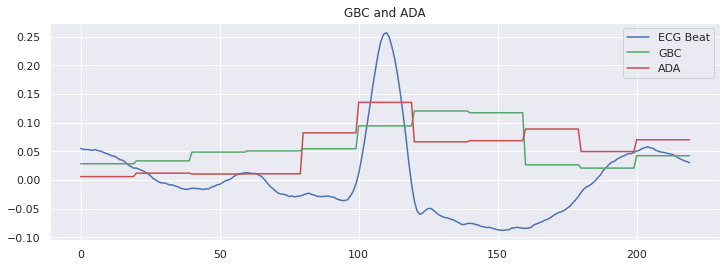

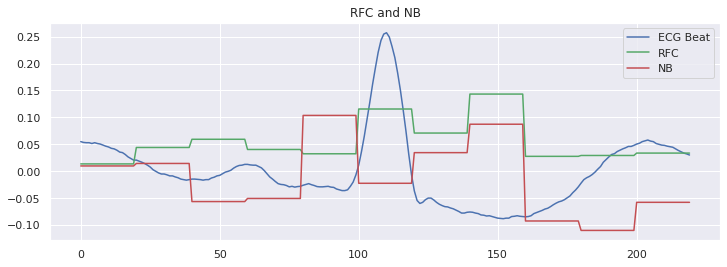

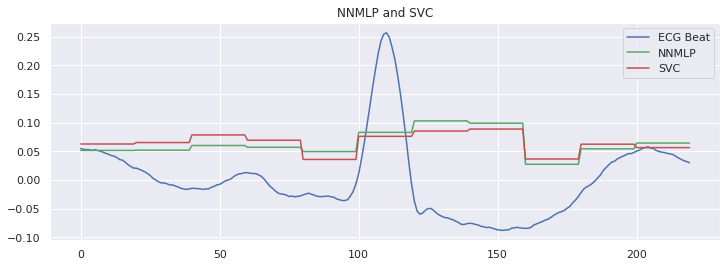

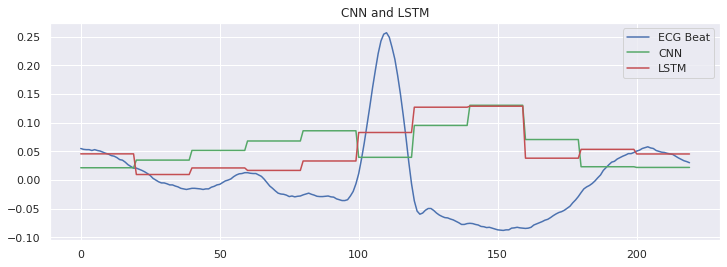

In [12]:
plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(gbc,color='g',label='GBC')
plt.plot(ada,color='r',label='ADA')
plt.title('GBC and ADA')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(rfc,color='g',label='RFC')
plt.plot(nb,color='r',label='NB')
plt.title('RFC and NB')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(nnmlp,color='g',label='NNMLP')
plt.plot(svc,color='r',label='SVC')
plt.title('NNMLP and SVC')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(cnn,color='g',label='CNN')
plt.plot(lstm,color='r',label='LSTM')
plt.title('CNN and LSTM')
plt.legend()
plt.show()

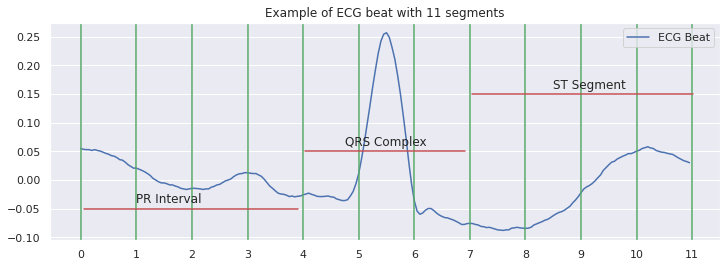

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')

xcoords = [0,20,40,60,80,100,120,140,160,180,200,220]
for xc in zip(xcoords):
    plt.axvline(x=xc, c='g')


plt.axhline(y=-0.05,xmin=0.05,xmax=0.37,color='r')
plt.axhline(y=0.05,xmin=0.38,xmax=0.62,color='r')
plt.axhline(y=0.15,xmin=0.63,xmax=0.96,color='r')

plt.text(x=20,y=-0.04,s='PR Interval')
plt.text(x=95,y=0.06,s='QRS Complex')
plt.text(x=170,y=0.16,s='ST Segment')


plt.legend()
plt.xticks(ticks=xcoords,labels=(0,1,2,3,4,5,6,7,8,9,10,11))
plt.title('Example of ECG beat with 11 segments')
plt.show()

In [13]:
gbc_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/gbc_pfi_corr.csv')
ada_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/ada_pfi_corr.csv')
rfc_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/rfc_pfi_corr.csv')
nb_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/nb_pfi_corr.csv')
nnmlp_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/nnmlp_pfi_corr.csv')
svc_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/svc_pfi_corr.csv')
lstm_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/lstm_pfi_corr.csv')
cnn_pfi_corr = pd.read_csv('./drive/MyDrive/compsci/pfi/cnn_pfi_corr.csv')

gbc_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/gbc_pfi_mis.csv')
ada_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/ada_pfi_mis.csv')
rfc_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/rfc_pfi_mis.csv')
nb_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/nb_pfi_mis.csv')
nnmlp_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/nnmlp_pfi_mis.csv')
svc_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/svc_pfi_mis.csv')
lstm_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/lstm_pfi_mis.csv')
cnn_pfi_mis = pd.read_csv('./drive/MyDrive/compsci/pfi/cnn_pfi_mis.csv')

In [15]:
gbc_pfi_corr = gbc_pfi_corr.weight.values
ada_pfi_corr = ada_pfi_corr.weight.values
rfc_pfi_corr = rfc_pfi_corr.weight.values
nb_pfi_corr = nb_pfi_corr.weight.values
nnmlp_pfi_corr = nnmlp_pfi_corr.weight.values
svc_pfi_corr = svc_pfi_corr.weight.values
lstm_pfi_corr = lstm_pfi_corr.weight.values
cnn_pfi_corr = cnn_pfi_corr.weight.values

gbc_pfi_mis = gbc_pfi_mis.weight.values
ada_pfi_mis = ada_pfi_mis.weight.values
rfc_pfi_mis = rfc_pfi_mis.weight.values
nb_pfi_mis = nb_pfi_mis.weight.values
nnmlp_pfi_mis = nnmlp_pfi_mis.weight.values
svc_pfi_mis = svc_pfi_mis.weight.values
lstm_pfi_mis = lstm_pfi_mis.weight.values
cnn_pfi_mis = cnn_pfi_mis.weight.values

In [20]:
gbc_corr = np.repeat(gbc_pfi_corr,20)
gbc_mis = np.repeat(gbc_pfi_mis,20)

ada_corr = np.repeat(ada_pfi_corr,20)
ada_mis = np.repeat(ada_pfi_mis,20)

rfc_corr = np.repeat(rfc_pfi_corr,20)
rfc_mis = np.repeat(rfc_pfi_mis,20)

nb_corr = np.repeat(nb_pfi_corr,20)
nb_mis = np.repeat(nb_pfi_mis,20)

nnmlp_corr = np.repeat(nnmlp_pfi_corr,20)
nnmlp_mis = np.repeat(nnmlp_pfi_mis,20)

svc_corr = np.repeat(svc_pfi_corr,20)
svc_mis = np.repeat(svc_pfi_mis,20)

cnn_corr = np.repeat(cnn_pfi_corr,20)
cnn_mis = np.repeat(cnn_pfi_mis,20)

lstm_corr = np.repeat(lstm_pfi_corr,20)
lstm_mis = np.repeat(lstm_pfi_mis,20)

n5= normalize(X_test)

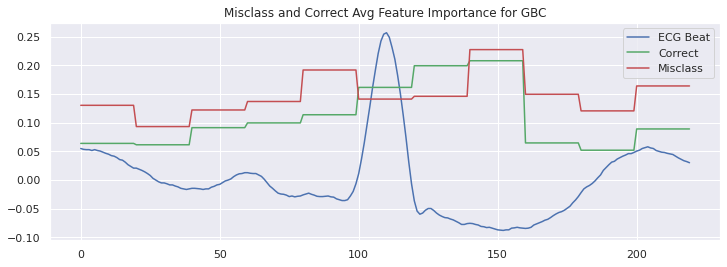

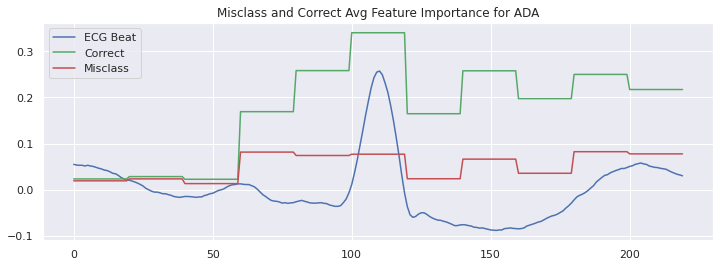

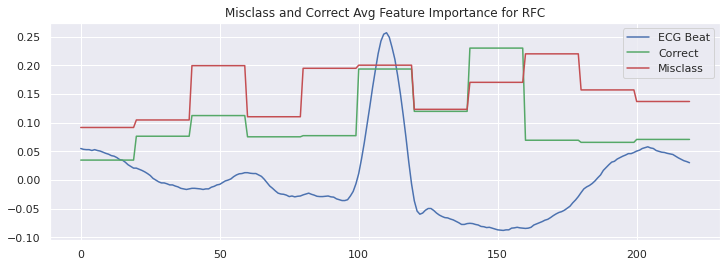

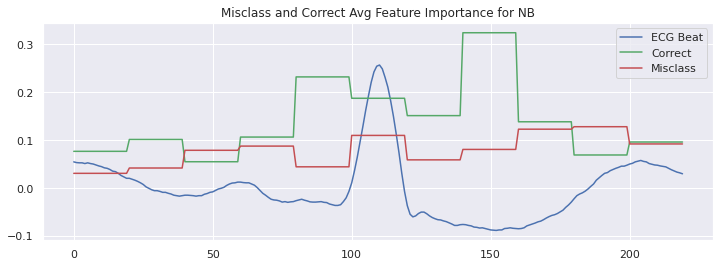

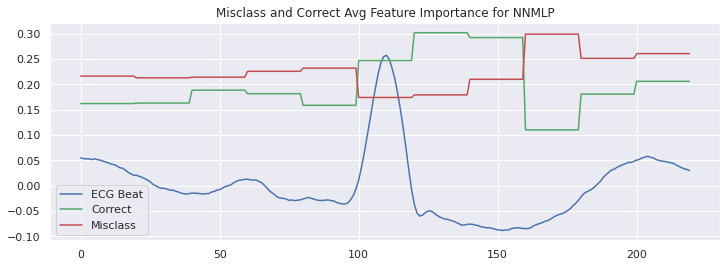

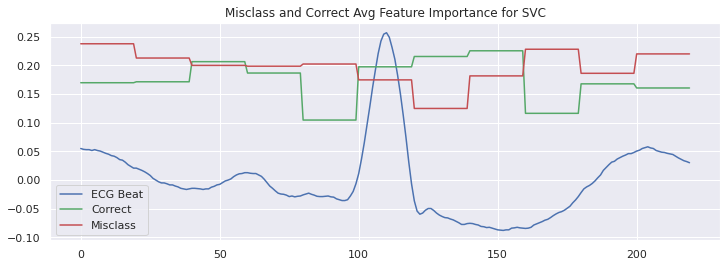

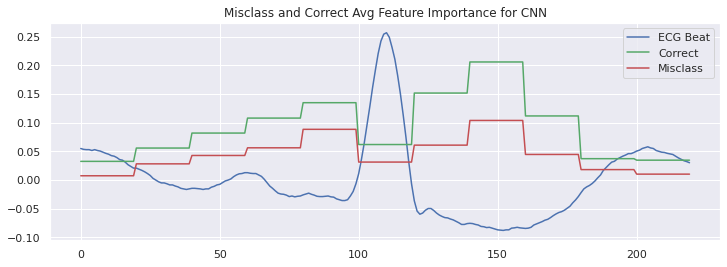

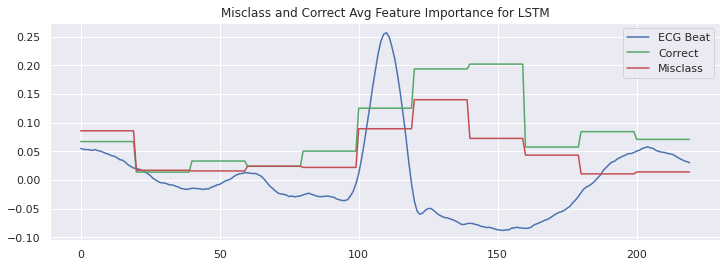

In [21]:
plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(gbc_corr,color='g',label='Correct')
plt.plot(np.abs(gbc_mis),color='r',label='Misclass')
plt.title('Misclass and Correct Avg Feature Importance for GBC')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(ada_corr,color='g',label='Correct')
plt.plot(np.abs(ada_mis),color='r',label='Misclass')
plt.title('Misclass and Correct Avg Feature Importance for ADA')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(rfc_corr,color='g',label='Correct')
plt.plot(np.abs(rfc_mis),color='r',label='Misclass')
plt.title('Misclass and Correct Avg Feature Importance for RFC')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(nb_corr,color='g',label='Correct')
plt.plot(np.abs(nb_mis),color='r',label='Misclass')
plt.title('Misclass and Correct Avg Feature Importance for NB')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(nnmlp_corr,color='g',label='Correct')
plt.plot(np.abs(nnmlp_mis),color='r',label='Misclass')
plt.title('Misclass and Correct Avg Feature Importance for NNMLP')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(svc_corr,color='g',label='Correct')
plt.plot(np.abs(svc_mis),color='r',label='Misclass')
plt.title('Misclass and Correct Avg Feature Importance for SVC')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(cnn_corr,color='g',label='Correct')
plt.plot(np.abs(cnn_mis),color='r',label='Misclass')
plt.title('Misclass and Correct Avg Feature Importance for CNN')
plt.legend()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n5[0],color='b',label='ECG Beat')
plt.plot(lstm_corr,color='g',label='Correct')
plt.plot(np.abs(lstm_mis),color='r',label='Misclass')
plt.title('Misclass and Correct Avg Feature Importance for LSTM')
plt.legend()
plt.show()